## An Empirical Comparison of Machine Learning Models for Early Prediction of Unemployment Rates Across Countries

In [107]:
%pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


#### Step 1: Understanding the Dataset

In [108]:
df_data = pd.read_csv("Unemployment_Rate_Dataset.csv") # Load dataset
df_data.head(20)

,Country Name,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,8.179629,8.270724,8.266327,8.138291,7.908446,7.823908,...,7.036357,7.194666,7.346331,7.360513,7.584419,8.191395,8.577385,7.985202,7.806365,7.772654
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,8.070000,8.011000,7.888000,7.822000,7.817000,7.867000,...,9.052000,10.133000,11.184000,11.196000,11.185000,11.710000,11.994000,14.100000,13.991000,13.295000
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,4.158680,4.251102,4.369805,4.393781,4.399749,4.340691,...,4.164467,4.157574,4.274196,4.323631,4.395271,4.852393,4.736732,3.658573,3.277245,3.218313
4,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,16.855000,16.978000,17.399000,17.400000,16.987000,16.275000,...,16.490000,16.575000,16.610000,16.594000,16.497000,16.690000,15.799000,14.602000,14.537000,14.464000
5,Albania,ALB,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,10.304000,30.007000,25.251000,20.835000,14.607000,13.928000,...,17.193000,15.418000,13.616000,12.304000,11.466000,11.690000,11.474000,10.137000,10.108000,10.250000
6,Andorra,AND,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,ARB,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,11.914508,12.160385,12.918274,13.025172,13.516863,12.477178,...,11.148914,10.856290,11.113108,10.659740,10.216098,11.325613,10.889659,9.953571,9.581397,9.461238
8,United Arab Emirates,ARE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1.625000,1.713000,1.905000,1.836000,1.800000,1.834000,...,1.793000,1.640000,2.462000,2.236000,2.331000,4.294000,3.105000,2.872000,2.151000,2.133000
9,Argentina,ARG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,5.440000,6.360000,10.100000,11.760000,18.800000,17.110000,...,7.579000,8.085000,8.347000,9.220000,9.843000,11.461000,8.736000,6.805000,6.139000,7.876000


In [109]:
df_data.shape 

(266, 38)

In [110]:
df_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023', '2024'],
      dtype='object')

In [111]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1991            235 non-null    float64
 5   1992            235 non-null    float64
 6   1993            235 non-null    float64
 7   1994            235 non-null    float64
 8   1995            235 non-null    float64
 9   1996            235 non-null    float64
 10  1997            235 non-null    float64
 11  1998            235 non-null    float64
 12  1999            235 non-null    float64
 13  2000            235 non-null    float64
 14  2001            235 non-null    float64
 15  2002            235 non-null    float64
 16  2003            235 non-null    float64
 17  2004            235 non-null    flo

In [112]:
df_data.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1991              float64
1992              float64
1993              float64
1994              float64
1995              float64
1996              float64
1997              float64
1998              float64
1999              float64
2000              float64
2001              float64
2002              float64
2003              float64
2004              float64
2005              float64
2006              float64
2007              float64
2008              float64
2009              float64
2010              float64
2011              float64
2012              float64
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
2018              float64
2019              float64
2020              float64
2021              float64
2022              float64
2023              float64
2024              float64
dtype: objec

In [113]:
df_data.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
261,Kosovo,XKX,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,8.409,8.342,8.344,8.340,8.988,9.585,...,17.900,18.416,18.603,17.584,17.202,17.953,18.287,17.363,17.091,17.086
263,South Africa,ZAF,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,23.002,23.262,23.179,22.942,22.647,22.480,...,25.149,26.536,27.035,26.906,28.468,29.217,34.007,33.268,32.098,33.168
264,Zambia,ZMB,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,18.900,19.544,19.700,18.648,16.828,15.300,...,5.942,5.239,4.529,5.033,5.542,6.033,5.199,5.995,5.905,5.961
265,Zimbabwe,ZWE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,4.813,4.938,4.990,4.960,5.571,6.163,...,5.377,5.886,6.344,6.793,7.373,8.621,9.540,10.087,8.759,8.554


In [114]:
df_data.describe()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,...,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,234.000000,232.000000,230.000000
mean,7.309450,7.657994,8.077971,8.228115,8.271647,8.382771,8.268826,8.305579,8.456762,8.333982,...,7.802640,7.667339,7.452974,7.206506,7.064106,8.121189,7.809688,6.949933,6.606764,6.521012
std,5.565850,5.866918,5.923331,5.833094,5.893925,5.899470,5.734063,5.659025,5.668398,5.699568,...,5.474281,5.369211,5.253675,5.205504,5.132942,5.498414,5.491331,5.285512,5.040455,5.007064
min,0.600000,0.596000,0.610000,0.617000,0.632000,0.616000,0.631000,0.645000,0.652000,0.634000,...,0.170000,0.150000,0.140000,0.110000,0.100000,0.140000,0.140000,0.130000,0.130000,0.126000
25%,3.091500,3.369500,3.877935,4.072500,4.130000,4.231500,4.176439,4.296083,4.443411,4.295584,...,4.227734,4.199787,4.016000,3.821267,3.707500,4.455500,4.452500,3.728500,3.563250,3.434000
50%,6.079498,6.316000,6.346000,6.889000,7.157000,7.222000,7.079000,7.187000,7.112627,6.776076,...,6.313000,6.029099,5.833000,5.511000,5.552000,6.690897,6.193192,5.469230,5.183500,5.077229
75%,9.574624,9.951500,10.687545,10.689339,10.490233,11.011518,10.850000,11.168500,11.654000,11.118000,...,9.838000,9.661000,9.239780,8.778789,8.833500,9.894745,9.469563,8.411122,7.979966,7.810413
max,30.228000,30.283000,30.348000,30.334000,35.600000,38.800000,36.000000,34.500000,32.400000,32.200000,...,27.695000,26.536000,27.035000,26.906000,28.468000,32.944000,34.153000,35.359000,35.086000,34.400000


In [115]:
# Define columns that are years (e.g., 1990 to 2024)
year_cols = [col for col in df_data.columns if col.isdigit()]

# Countries where all year columns are missing (NaN)
all_missing = df_data[df_data[year_cols].isnull().all(axis=1)]

# Show total count
num_all_missing = all_missing.shape[0]
print(f"Total number of countries missing ALL unemployment year data rate: {num_all_missing}")

# Optionally, show their names
all_missing[['Country Name']]




Total number of countries missing ALL unemployment year data rate: 31


,Country Name
0,Aruba
6,Andorra
11,American Samoa
12,Antigua and Barbuda
27,Bermuda
51,Curacao
52,Cayman Islands
57,Dominica
78,Faroe Islands
79,"Micronesia, Fed. Sts."


In [116]:
# Ensure 'Missing_Years' is computed
df_data['Missing_Years'] = df_data[year_cols].isnull().sum(axis=1)

# Select countries with some (but not all) missing years
partial_missing = df_data[
    (df_data['Missing_Years'] > 0) & (df_data['Missing_Years'] < len(year_cols))
][['Country Name', 'Missing_Years']]

# Total number of such countries
num_partial_missing = partial_missing.shape[0]
print(f"Total number of countries with PARTIALLY missing unemployment data rate: {num_partial_missing}")

# Optionally, display the top 20
partial_missing = partial_missing.sort_values(by='Missing_Years', ascending=False)
partial_missing.head(20)


Total number of countries with PARTIALLY missing unemployment data rate: 5


,Country Name,Missing_Years
248,Ukraine,3
196,West Bank and Gaza,2
206,Sudan,2
130,Lebanon,1
216,South Sudan,1


In [117]:
# Select countries with no missing unemployment rates
countries_full_data = df_data[df_data['Missing_Years'] == 0][['Country Name']]

# Print the exact number of such countries
print(f"Countries with COMPLETE unemployment data rate: {len(countries_full_data)}")

# Optionally, display the first 20 country names
countries_full_data.head(20)



Countries with COMPLETE unemployment data rate: 230


,Country Name
1,Africa Eastern and Southern
2,Afghanistan
3,Africa Western and Central
4,Angola
5,Albania
7,Arab World
8,United Arab Emirates
9,Argentina
10,Armenia
13,Australia


#### Step 2: Handle Missing Data

##### Step 1.1 Drop Countries with all missing Data

In [118]:
# Drop countries missing ALL unemployment year data rate

year_cols = [col for col in df_data.columns if col.isdigit()]
df_cleaned = df_data.dropna(subset=year_cols, how='all').copy()



In [119]:
# Verify the number of remaining rows

print(f"Shape after removing countries with all missing data: {df_cleaned.shape}")

Shape after removing countries with all missing data: (235, 39)


##### 1.2 Handle Partially Missing Data

In [120]:
# Impute missing values using linear interpolation for each country

df_cleaned[year_cols] = df_cleaned[year_cols].interpolate(method='linear', axis=1, limit_direction='both')

# Check if any missing values remain in year columns
print(f"Remaining missing values in year columns: {df_cleaned[year_cols].isnull().sum().sum()}")



Remaining missing values in year columns: 0


In [121]:
# Verify no missing values remain

print(f"Final check for missing values: {df_cleaned[year_cols].isnull().sum().sum()}")

Final check for missing values: 0


##### 1.3 Drop Unnecessary/Redundant Columns

In [122]:
# Drop non-essential columns
df_cleaned = df_cleaned.drop(columns=['Indicator Name', 'Indicator Code', 'Missing_Years'])

# Verify remaining columns
print(df_cleaned.columns)

Index(['Country Name', 'Country Code', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024'],
      dtype='object')


#### Step 2: Handle outliers

##### 2.1 Detect Outliers

In [123]:
# Drop rows with any NaN in year columns before outlier detection
df_no_nan = df_cleaned.dropna(subset=year_cols)

print(f"Shape before outlier detection: {df_no_nan.shape}")


Shape before outlier detection: (235, 36)


In [124]:
# Outlier Detection and Capping for Unemployment Rates
# 1. Standardize and detect outlier countries using Isolation Forest
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_no_nan[year_cols])

iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_labels = iso_forest.fit_predict(scaled_data)
outliers = df_no_nan[outlier_labels == -1].copy()
print(f"Number of outlier countries: {len(outliers)}")
print("Outlier countries:\n", outliers[['Country Name']])

# 2. Compute capping thresholds for each year (5th/95th percentiles)
cap_lower = df_no_nan[year_cols].quantile(0.05)
cap_upper = df_no_nan[year_cols].quantile(0.95)

# 3. Build a summary table: only rows where capping changed the value
records = []
for idx, row in outliers.iterrows():
    country = row['Country Name']
    for year in year_cols:
        orig_val = row[year]
        if pd.isnull(orig_val):
            continue
        capped_val = min(max(orig_val, cap_lower[year]), cap_upper[year])
        cap_applied = ''
        if orig_val < cap_lower[year]:
            cap_applied = 'Lower'
        elif orig_val > cap_upper[year]:
            cap_applied = 'Upper'
        if cap_applied:  # Only record rows where capping was applied
            records.append({
                'Country': country,
                'Year': year,
                'Original Value': orig_val,
                'Capped Value': capped_val,
                'Cap Applied': cap_applied
            })

summary_df = pd.DataFrame(records)

# 4. Count unique countries affected and print list
num_countries_affected = summary_df['Country'].nunique()
countries_list = summary_df['Country'].unique()

print(f"\nNumber of unique countries affected (with capped outlier values): {num_countries_affected}")
print(f"List of affected countries:\n{countries_list}")

# 5. Display ALL rows of the result (not recommended for huge outputs in notebook)
pd.set_option('display.max_rows', None)
print(summary_df)
pd.reset_option('display.max_rows')

# 6. Save as CSV for easier viewing:
summary_df.to_csv("outlier_capping_summary.csv", index=False)
print("Saved to outlier_capping_summary.csv")


Number of outlier countries: 12
Outlier countries:
                Country Name
24   Bosnia and Herzegovina
33                 Botswana
56                 Djibouti
60                  Algeria
70                    Spain
89                   Greece
157         North Macedonia
162              Montenegro
171                 Namibia
196      West Bank and Gaza
224                Eswatini
263            South Africa

Number of unique countries affected (with capped outlier values): 12
List of affected countries:
['Bosnia and Herzegovina' 'Botswana' 'Djibouti' 'Algeria' 'Spain' 'Greece'
 'North Macedonia' 'Montenegro' 'Namibia' 'West Bank and Gaza' 'Eswatini'
 'South Africa']
                    Country  Year  Original Value  Capped Value Cap Applied
0    Bosnia and Herzegovina  1994          20.383       20.0514       Upper
1    Bosnia and Herzegovina  1995          21.078       19.8211       Upper
2    Bosnia and Herzegovina  1996          21.725       20.4473       Upper
3    Bosnia and 

#### 2.2 Handle Outliers 

In [125]:
# Cap outliers at the 5th and 95th percentiles
for col in year_cols:
    lower_bound = df_cleaned[col].quantile(0.05)
    upper_bound = df_cleaned[col].quantile(0.95)
    df_cleaned[col] = df_cleaned[col].clip(lower=lower_bound, upper=upper_bound)

# Verify the effect by checking the summary statistics
print(df_cleaned[year_cols].describe())

             1991        1992        1993        1994        1995        1996  \
count  235.000000  235.000000  235.000000  235.000000  235.000000  235.000000   
mean     7.157257    7.472724    7.886129    8.044121    8.049359    8.164448   
std      5.086335    5.252507    5.306188    5.212923    5.108611    5.105281   
min      1.085300    1.350000    1.430000    1.487900    1.471000    1.475800   
25%      3.091500    3.369500    3.877935    4.072500    4.130000    4.231500   
50%      6.079498    6.316000    6.346000    6.889000    7.157000    7.222000   
75%      9.574624    9.951500   10.687545   10.689339   10.490233   11.011518   
max     18.972000   19.544300   19.700000   20.051400   19.821100   20.447300   

             1997        1998        1999        2000  ...        2015  \
count  235.000000  235.000000  235.000000  235.000000  ...  235.000000   
mean     8.067197    8.102060    8.246348    8.107054  ...    7.660978   
std      5.002310    4.916805    4.902273    4.8

#### Step 3: Data Transformation for Exploratory Data Analysis (EDA)

In [126]:
# Melt the dataframe to long format,It reshapes your data for easy plotting and analysis across countries and years.
# Each row is a single country-year observation.


df_long = pd.melt(
    df_cleaned,
    id_vars=['Country Name', 'Country Code'],
    value_vars=year_cols,
    var_name='Year',
    value_name='Unemployment Rate'
)

# Convert Year and Unemployment Rate to correct types
df_long['Year'] = df_long['Year'].astype(int)
df_long['Unemployment Rate'] = df_long['Unemployment Rate'].astype(float)

# Drop rows where Unemployment Rate is missing (NaN)
df_long = df_long.dropna(subset=['Unemployment Rate'])

# EDA: Print shape and a few summaries
print(df_long.head(20))
print(f"\nShape of long dataframe: {df_long.shape}")
print(f"Number of unique countries: {df_long['Country Name'].nunique()}")
print(f"Years available: {sorted(df_long['Year'].unique())}")
print(f"Missing values in Unemployment Rate: {df_long['Unemployment Rate'].isnull().sum()}")
print("\nSummary statistics for Unemployment Rate:")
print(df_long['Unemployment Rate'].describe())


                   Country Name Country Code  Year  Unemployment Rate
0   Africa Eastern and Southern          AFE  1991           8.179629
1                   Afghanistan          AFG  1991           8.070000
2    Africa Western and Central          AFW  1991           4.158680
3                        Angola          AGO  1991          16.855000
4                       Albania          ALB  1991          10.304000
5                    Arab World          ARB  1991          11.914508
6          United Arab Emirates          ARE  1991           1.625000
7                     Argentina          ARG  1991           5.440000
8                       Armenia          ARM  1991           1.783000
9                     Australia          AUS  1991           9.586000
10                      Austria          AUT  1991           3.420000
11                   Azerbaijan          AZE  1991           1.085300
12                      Burundi          BDI  1991           3.158000
13                  

#### Step 4: Exploratory Data Analysis

##### 4.1 Global Unemployment Trend 

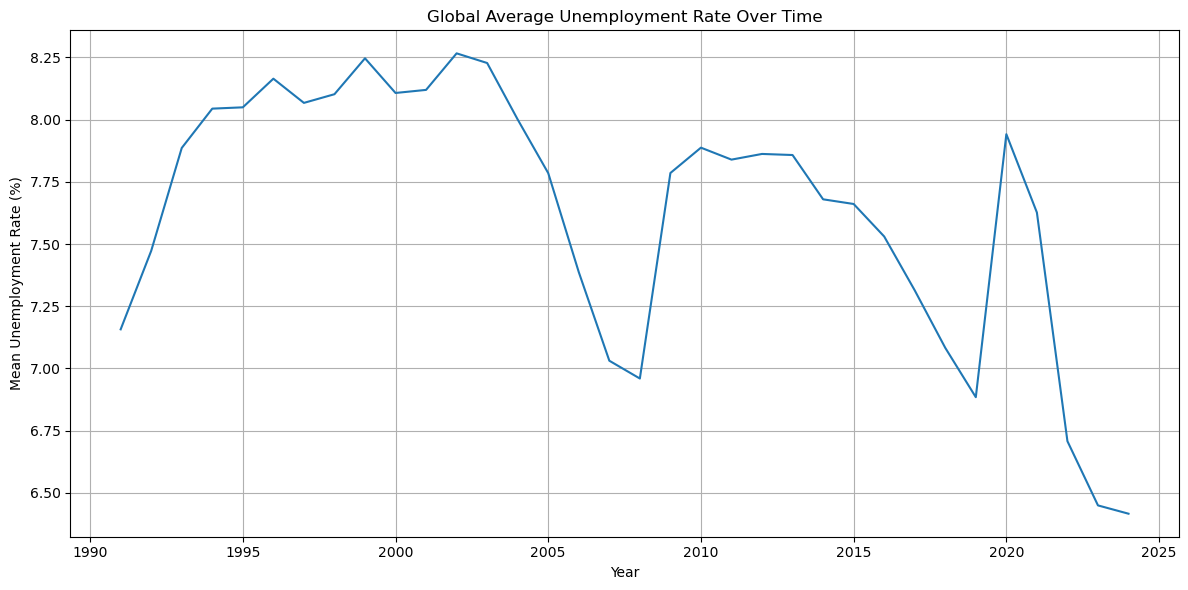

In [ ]:
# Global mean unemployment rate by year
yearly_trend = df_long.groupby('Year')['Unemployment Rate'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values)
plt.title('Global Average Unemployment Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()



# This plot shows how the global average unemployment rate changes over time,
# highlighting key trends such as spikes during major economic crises
# (e.g., the 2008–2009 financial crisis and the 2020 pandemic).

##### 4.2 Distribution of Unemployment Rates (All Countries, All Years)

1.The distribution is a bell shaped showing the peak to be around 5-7.5% unemployment rate,indicating this range to be the most common.
>
2.There are secondary peaks around 17.5-20%, suggesting some outliers or a secondary cluster(eg different economic conditions) of higher unemployment rates
  

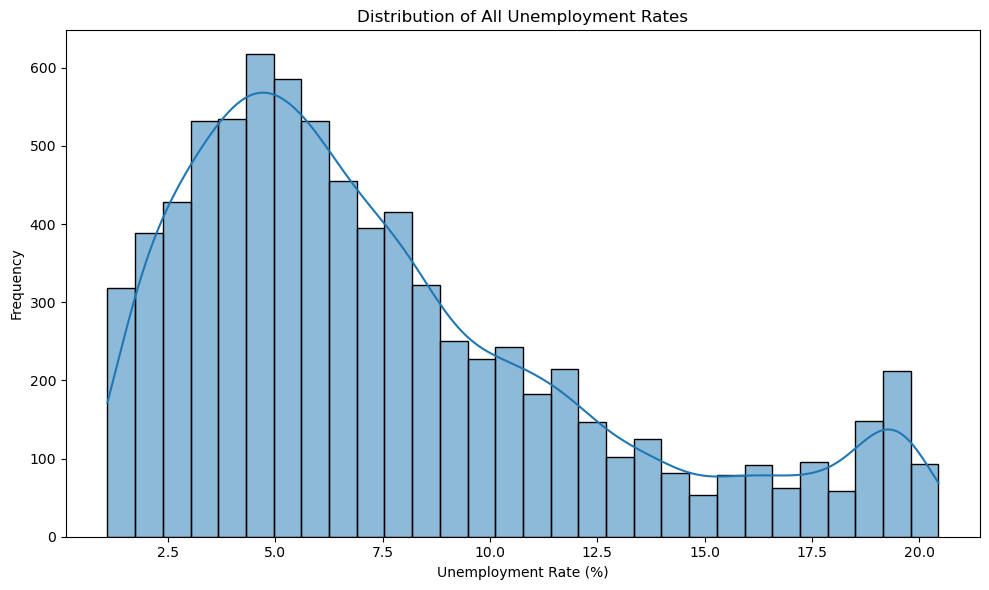

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_long['Unemployment Rate'], bins=30, kde=True)
plt.title('Distribution of All Unemployment Rates')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



##### 4.3 Boxplot by Year (Spread Over Time)

1.Notable outliers appear around 2009 (post-financial crisis), 2013 (post-European debt crisis), and 2020 (pandemic), where unemployment rates exceeded the upper whisker, reaching close to 20%. These spikes suggest acute economic disruptions affecting employment significantly in those years.

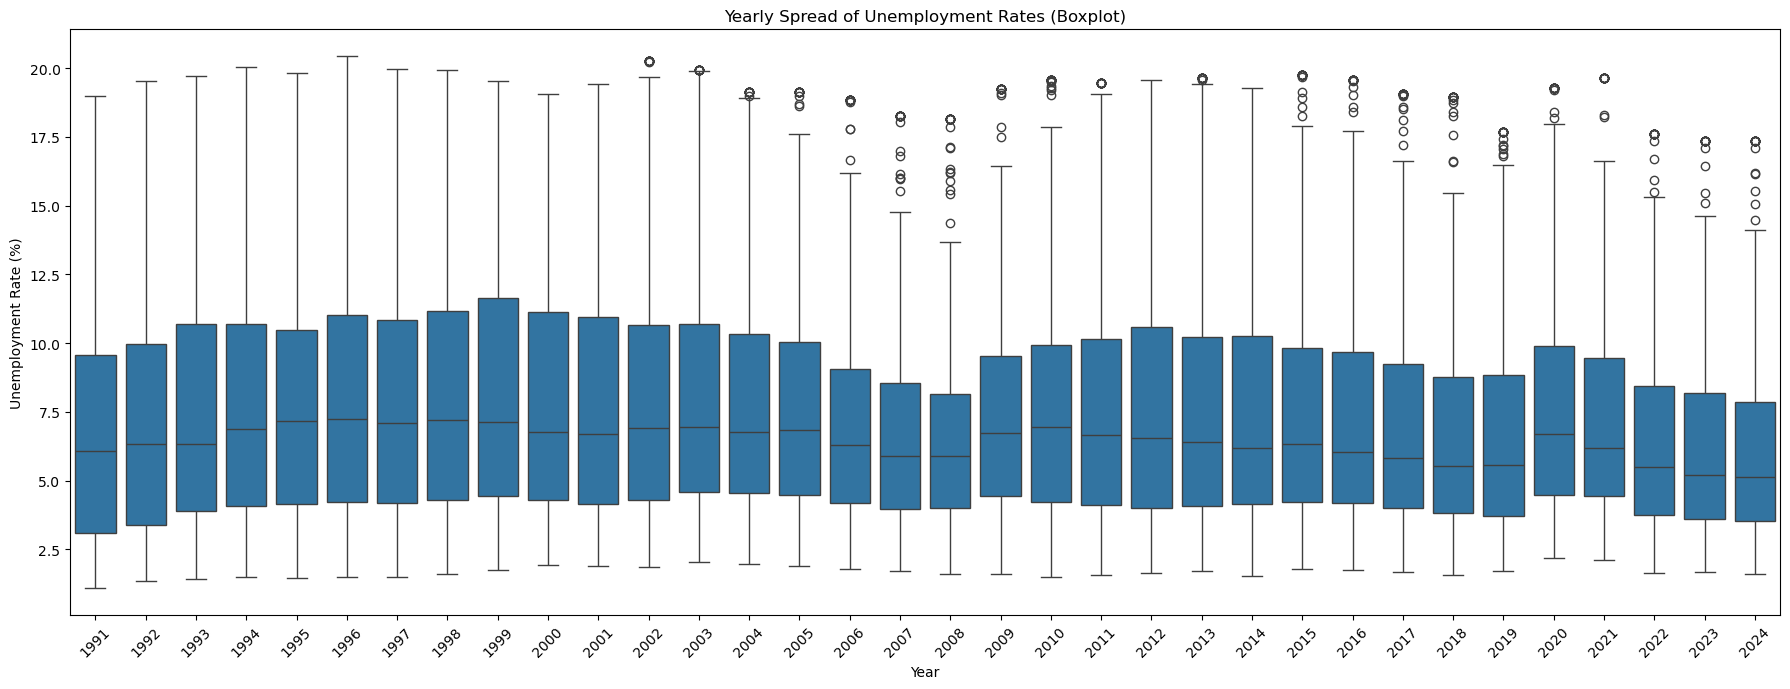

In [153]:
# Boxplot to visualize the spread of unemployment rates across years
# This boxplot displays the spread of unemployment rates across years from 1991 to 2024, 
# with the x-axis representing years and the y-axis representing unemployment rates (in percentage, ranging from 2.5% to 20%).
plt.figure(figsize=(18, 7))
sns.boxplot(x='Year', y='Unemployment Rate', data=df_long)
plt.title('Yearly Spread of Unemployment Rates (Boxplot)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 4.4 Country Trend Example (Kenya)

1.The unemployment rate fluctuated slightly between approximately 2.8% and 3.2%, with minor peaks and troughs, indicating relative stability over this 25-year period. The rate remained consistently low, suggesting a steady labor market during these years.
>
2.Starting around 2015, the unemployment rate began to rise sharply, reaching approximately 4.5% by 2020. This significant upward trend could reflect economic challenges, such as policy changes, global economic influences, or local factors like the impact of the COVID-19 pandemic.
>
3.The rate peaked around 5.5% in 2022-2023, the highest point in the dataset, before slightly declining to about 5.0% by mid-2025

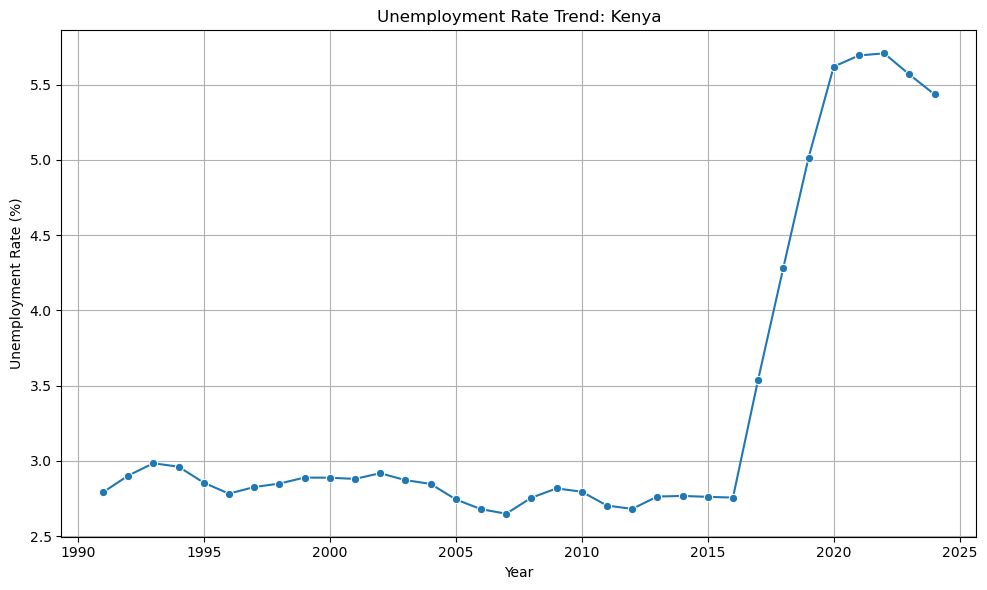

In [152]:
# Example: Plotting unemployment rate trend for a specific country
# Change to any country name you want to analyze


country = "Kenya" 
df_country = df_long[df_long['Country Name'] == country]
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Unemployment Rate', data=df_country, marker='o')
plt.title(f'Unemployment Rate Trend: {country}')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 4.5 Top and Bottom Countries (2024)

Identify countries with the highest and lowest unemployment rates in the most recent year (2024)
>
1.This group includes countries like St. Vincent and the Grenadines, Botswana, Namibia, and South Africa, with unemployment rates ranging from approximately 10% to 17.5%.
>
2.The data suggests a wide disparity in economic stability and labor market health across countries, with the top group likely facing issues like political instability, economic downturns, 
>
or lack of job creation, while the bottom group may benefit from stable governance, diversified economies, or resource wealth.
>
E.g Botswana: Around 17% unemployment could be linked to economic reliance on diamond exports, leading to vulnerability during global market fluctuations.
>
Qatar: With a rate close to 0%, its diversified economy (oil, gas, and infrastructure projects) and resource wealth under stable governance are key factors.

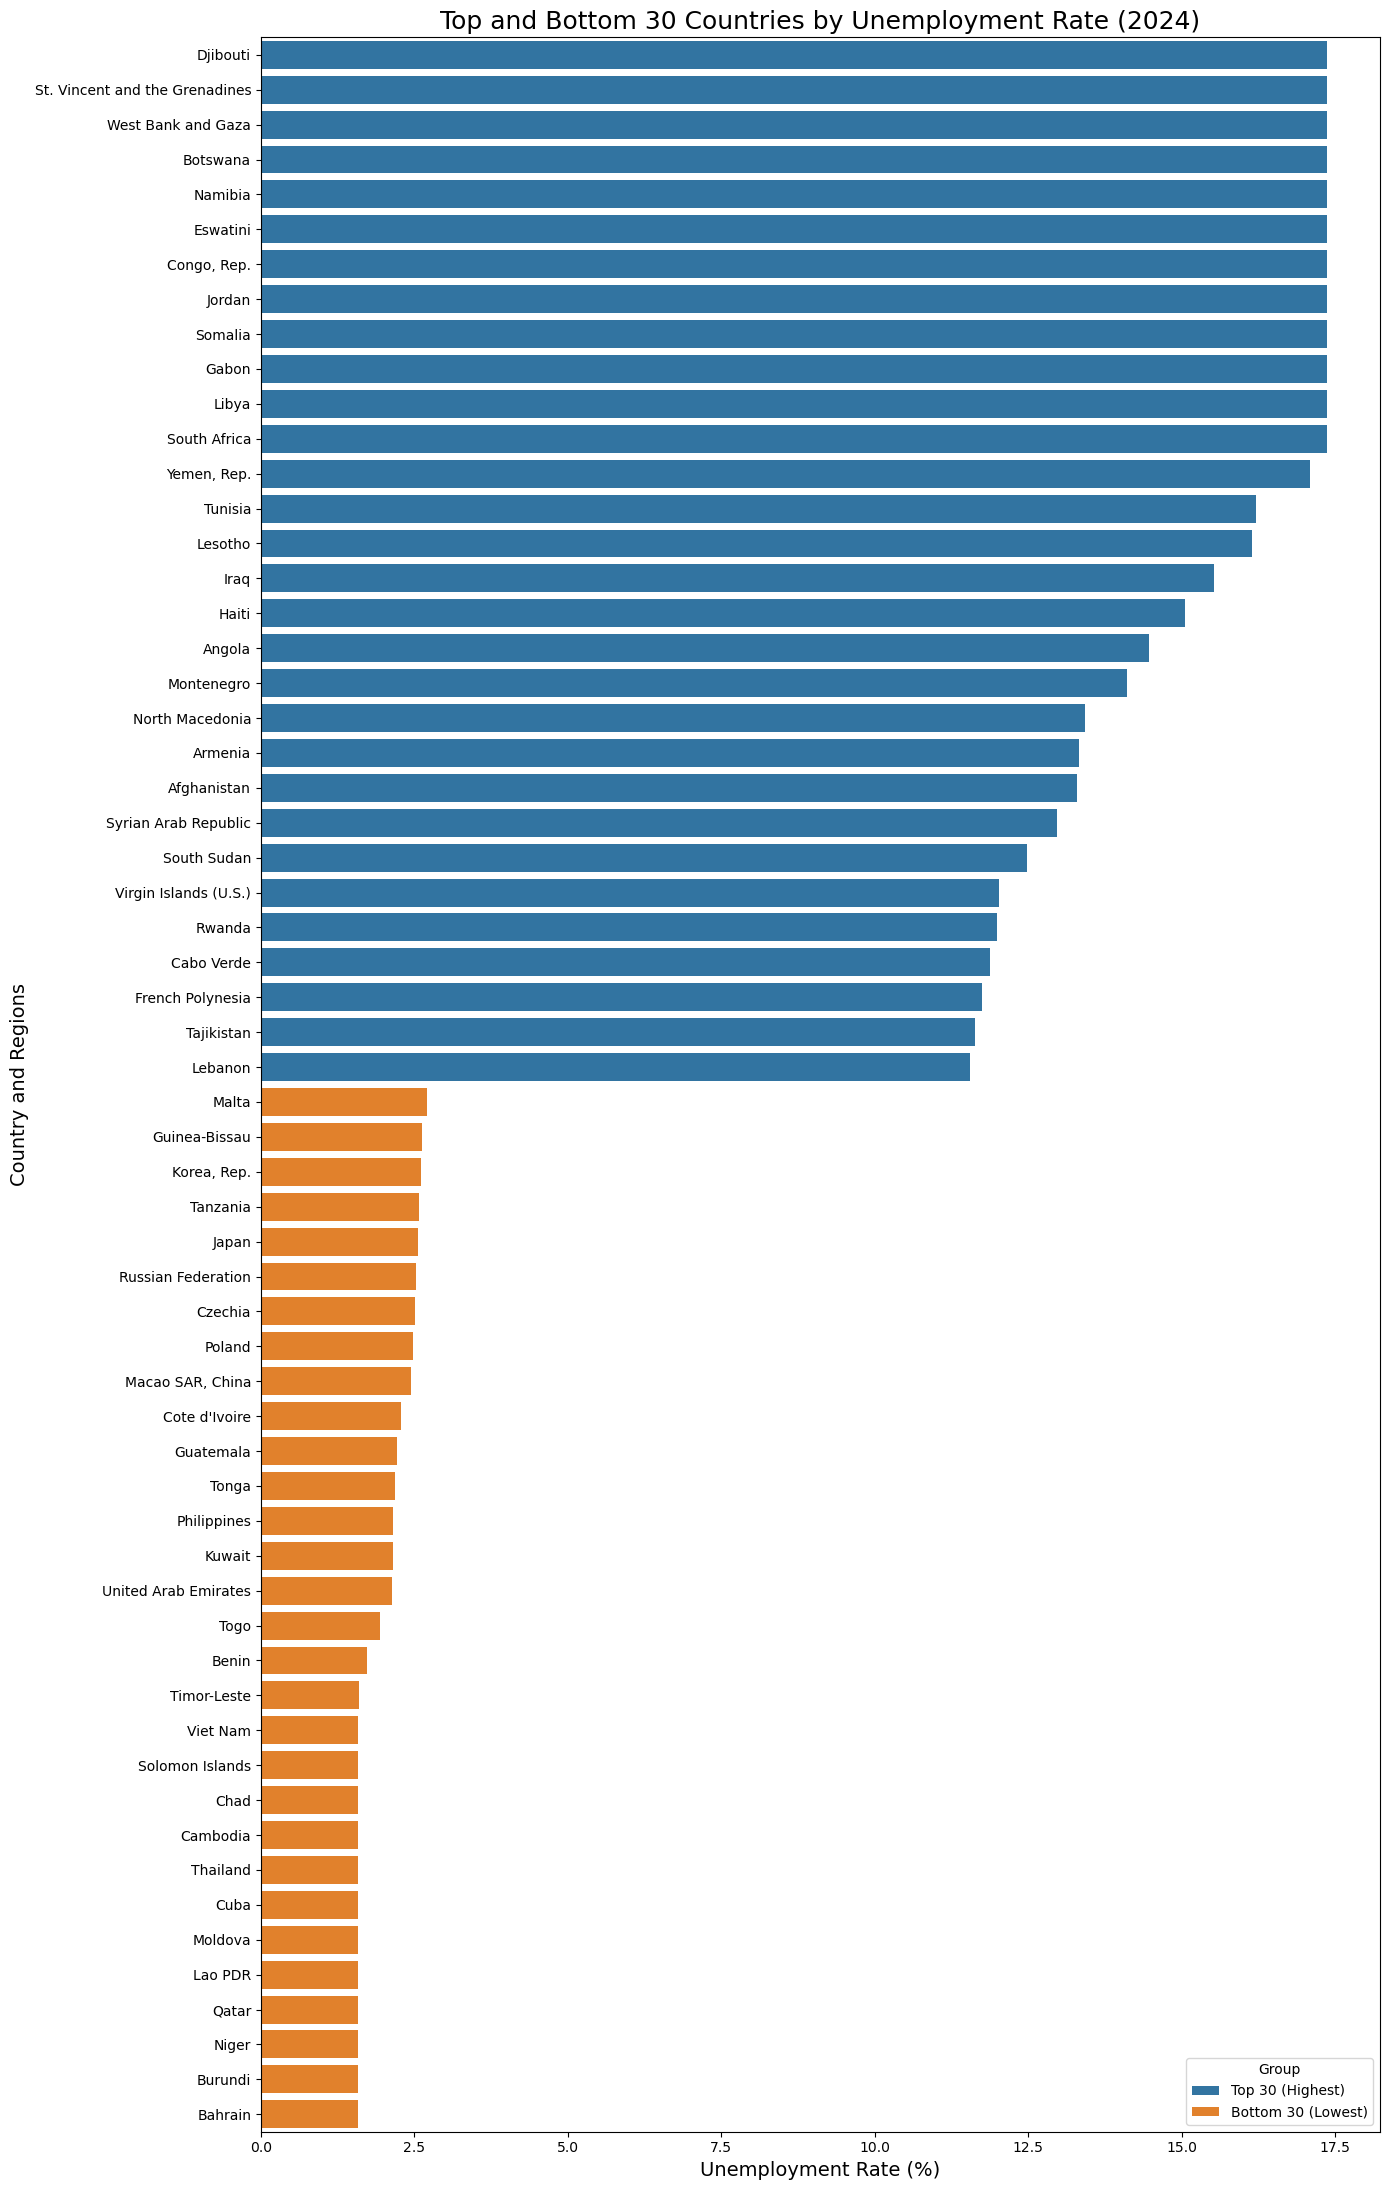

In [150]:
# This identifies countries with extreme unemployment rates in 2024, providing insight into economic disparities.
# Filter for 2024 and sort by unemployment rate
df_2024 = df_long[df_long['Year'] == 2024][['Country Name', 'Unemployment Rate']].sort_values(by='Unemployment Rate', ascending=False)

# Top 30 and bottom 30
top_30 = df_2024.head(30).copy()
bottom_30 = df_2024.tail(30).copy()

# Add group labels
top_30['Group'] = 'Top 30 (Highest)'
bottom_30['Group'] = 'Bottom 30 (Lowest)'

# Combine data
extreme_countries = pd.concat([top_30, bottom_30])

# Sort for visualization
extreme_countries = extreme_countries.sort_values(by='Unemployment Rate', ascending=False)

# Plot bar chart
plt.figure(figsize=(14, 22))  # taller for 100 countries
sns.barplot(
    data=extreme_countries, 
    x='Unemployment Rate', 
    y='Country Name', 
    hue='Group', 
    dodge=False
)

plt.title('Top and Bottom 30 Countries by Unemployment Rate (2024)', fontsize=18)
plt.xlabel('Unemployment Rate (%)', fontsize=14)
plt.ylabel('Country and Regions', fontsize=14)
plt.legend(title='Group')
plt.tight_layout()
plt.show()





##### 4.6 Regional Analysis

The plot compares regional unemployment rate trends over more than 30 years.
The y-axis shows the unemployment rate (%) and the x-axis shows the year from 1991 to 2024.

1. Regional Disparities
>
Arab World and North Africa, Middle East, Afghanistan & Pakistan have the highest unemployment rates, often peaking above 12–14%. This suggests persistent structural labor market challenges in these regions, potentially due to factors like political instability, youth bulges, or economic structure.
>
Europe & Central Asia, Central Europe and the Baltics, and Euro Area display relatively high unemployment rates (often 8–12%), with noticeable peaks and recoveries likely reflecting both global crises and local recessions.
>
South Asia, Sub-Saharan Africa, and Africa Western and Central show much lower unemployment rates (often below 6%). This may be partly due to large informal sectors, labor underreporting, or differences in labor market definitions.
>
2. Trends and Turning Points
>
Steady Declines: Some regions (e.g., North America, European Union) show a general downward trend in unemployment after crises, reflecting economic recovery and resilience.
>
Persistent Highs: The Arab World and Middle East region lines remain high across the entire period, with only minor declines, highlighting long-term systemic issues.
>
Volatility: Regions like "Central Europe and the Baltics" and "Europe & Central Asia" show frequent peaks and valleys, indicating higher economic or political instability.
>
Convergence: Towards 2024, most regions seem to converge to a band between 4% and 10%, possibly due to post-pandemic recovery, structural reforms, or harmonization of economic cycles.

3. Regional Anomalies
>
South Asia’s consistently low rates (near 4%) might not indicate actual full employment but could be due to labor force definition, widespread informal labor, or underemployment.
>
Latin America & Caribbean shows moderate unemployment, but with significant volatility, possibly reflecting both economic shocks and regional political changes.

Conclusion:
>
This graph demonstrates that while all global regions are affected by major economic crises, their unemployment trajectories are highly diverse. Some, like the Arab World and parts of Europe, face chronically high unemployment, while others maintain low but possibly misleading rates due to informality. World events create synchronous spikes, but recovery and resilience are uneven, highlighting the need for region-specific labor and economic policies.



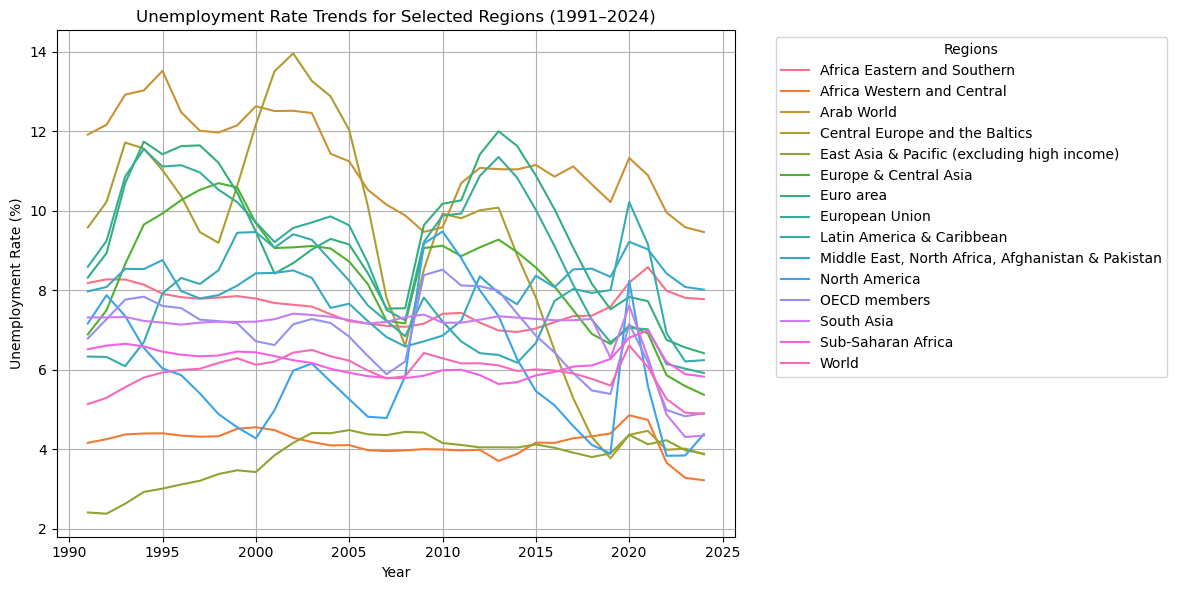

In [ ]:
# Analyzing these provides a macro-level perspective,complementing country specific analyses.
# Plot unemployment trends for selected regions
selected_regions = [
    'Africa Eastern and Southern',
    'Africa Western and Central',
    'Arab World',
    'Central Europe and the Baltics',
    'East Asia & Pacific (excluding high income)',
    'Europe & Central Asia',
    'Euro area',
    'European Union',
    'Latin America & Caribbean',
    'Middle East, North Africa, Afghanistan & Pakistan',
    'North America',
    'OECD members',
    'South Asia',
    'Sub-Saharan Africa',
    'World'
]
df_selected = df_long[df_long['Country Name'].isin(selected_regions)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_selected, x='Year', y='Unemployment Rate', hue='Country Name')
plt.title('Unemployment Rate Trends for Selected Regions (1991–2024)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='Regions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Step 5: Correlation Analysis
Correlation Matrix of Unemployment Rates (1991–2024)

What the Plot Shows
>
*Each cell in this heatmap represents the correlation coefficient between unemployment rates in two different years (across all countries).
>
*The diagonal is always darkest (correlation = 1, since each year is perfectly correlated with itself).

Color gradient:

Darker red = higher correlation (closer to 1).

Lighter = lower correlation (but here, all are high: ~0.68–1.0).

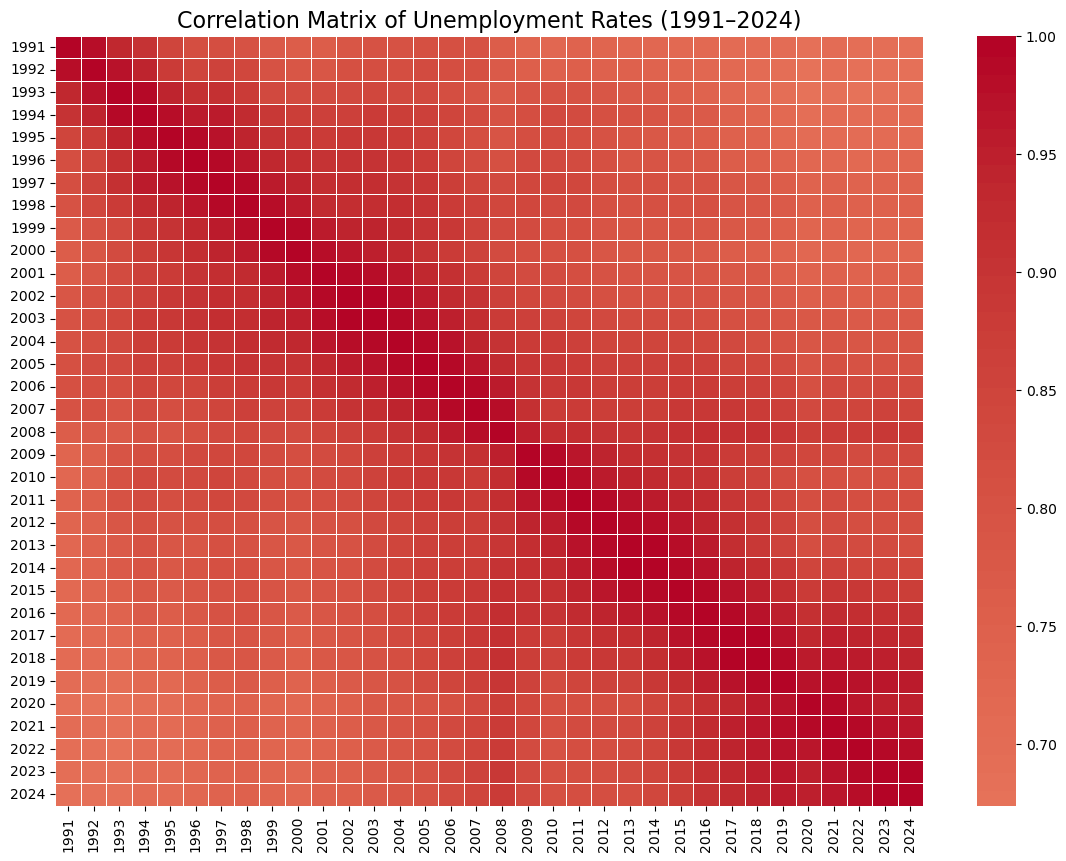

In [132]:
# The heatmap shows how unemployment rates in different years correlate, indicating whether high unemployment persists over time.
# Compute correlation matrix for unemployment rates across years
corr_matrix = df_cleaned[year_cols].corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False, linewidths=0.5)
plt.title('Correlation Matrix of Unemployment Rates (1991–2024)', fontsize=16)
plt.show()

#### Step 6: Prepare Data for Modeling

In [133]:
df_cleaned.head()


,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1,Africa Eastern and Southern,AFE,8.179629,8.270724,8.266327,8.138291,7.908446,7.823908,7.783654,7.812734,...,7.036357,7.194666,7.346331,7.360513,7.584419,8.191395,8.577385,7.985202,7.806365,7.772654
2,Afghanistan,AFG,8.070000,8.011000,7.888000,7.822000,7.817000,7.867000,7.863000,7.890000,...,9.052000,10.133000,11.184000,11.196000,11.185000,11.710000,11.994000,14.100000,13.991000,13.295000
3,Africa Western and Central,AFW,4.158680,4.251102,4.369805,4.393781,4.399749,4.340691,4.313735,4.324049,...,4.164467,4.157574,4.274196,4.323631,4.395271,4.852393,4.736732,3.658573,3.277245,3.218313
4,Angola,AGO,16.855000,16.978000,17.399000,17.400000,16.987000,16.275000,16.172000,16.371000,...,16.490000,16.575000,16.610000,16.594000,16.497000,16.690000,15.799000,14.602000,14.537000,14.464000
5,Albania,ALB,10.304000,19.544300,19.700000,20.051400,14.607000,13.928000,16.872000,19.939100,...,17.193000,15.418000,13.616000,12.304000,11.466000,11.690000,11.474000,10.137000,10.108000,10.250000
